In [28]:
# Import our main libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This makes our plots look nice
sns.set_style('whitegrid') 

print("Libraries loaded!")

Libraries loaded!


In [33]:
# Load the CSV file into a DataFrame called 'df'
# This might take a few seconds as it's a big file
df = pd.read_csv('D:\\Data analytics\\Spotify_Project\\charts.csv')

print("File loaded successfully!")

# Now, let's look at it
print("\n--- First 5 Rows (Head) ---")
print(df.head())

print("\n--- Column Info ---")
# This shows us all column names and their data types
df.info()

File loaded successfully!

--- First 5 Rows (Head) ---
                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  to

In [34]:
print("Starting to clean data...")

# 1. Create a new DataFrame 'viral_df' that ONLY has 'viral50' rows
viral_df = df[df['chart'] == 'viral50'].copy()

# 2. Convert the 'date' column from a string (object) to a real datetime
viral_df['date'] = pd.to_datetime(viral_df['date'])

# 3. Drop columns we don't need for this analysis
# We're dropping 'rank', 'url', 'trend', 'streams', and 'chart' (since it's now just 'viral50')
viral_df = viral_df.drop(columns=['rank', 'url', 'trend', 'streams', 'chart'])

# 4. Check our new, clean DataFrame
print("--- Cleaned 'viral_df' Info ---")
viral_df.info()

print("\n--- Cleaned 'viral_df' Head ---")
print(viral_df.head())

print("\nData is clean and ready!")

Starting to clean data...
--- Cleaned 'viral_df' Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 5851610 entries, 12808 to 26173513
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   title   object        
 1   date    datetime64[ns]
 2   artist  object        
 3   region  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 223.2+ MB

--- Cleaned 'viral_df' Head ---
           title       date      artist      region
12808       Boys 2017-08-01  Charli XCX      Latvia
12965    Hold Me 2017-08-01       R3HAB  Luxembourg
13781  Hola Hola 2017-08-01        KARD        Peru
14042    Cuídate 2017-08-01     Zetazen       Spain
14092       Boys 2017-08-01  Charli XCX      Taiwan

Data is clean and ready!


In [35]:
# 1. Group by both 'title' and 'artist' (to avoid songs with the same name)
# 2. .size() counts the number of rows (days) for each group
# 3. .reset_index(name=...) turns the count into a new column called 'total_days_on_chart'
song_virality = viral_df.groupby(['title', 'artist']).size().reset_index(name='total_days_on_chart')

# 4. Sort the list to see the highest numbers at the top
top_viral_songs = song_virality.sort_values(by='total_days_on_chart', ascending=False)

# 5. Print the Top 10
print("Top 10 Most Viral Songs (Global):")
print(top_viral_songs.head(10))

Top 10 Most Viral Songs (Global):
                                       title               artist  \
24633                           Dance Monkey          Tones And I   
92845                  Roses - Imanbek Remix            SAINt JHN   
8332                  Astronaut In The Ocean          Masked Wolf   
14089                        Blinding Lights           The Weeknd   
105005                      Sweet but Psycho              Ava Max   
125976      death bed (coffee for your head)   Powfu, beabadoobee   
126422  ily (i love you baby) (feat. Emilee)            Surf Mesa   
17747                          Calma - Remix  Pedro Capó, Farruko   
35578                                Falling        Trevor Daniel   
7837                                  Arcade      Duncan Laurence   

        total_days_on_chart  
24633                 12824  
92845                  9450  
8332                   9217  
14089                  8023  
105005                 8002  
125976                 796

Creating visualization...


C:\Users\yashr\AppData\Local\Temp\ipykernel_20012\2845294090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_to_plot['song_artist'] = top_10_to_plot['artist'] + ' - ' + top_10_to_plot['title']
C:\Users\yashr\AppData\Local\Temp\ipykernel_20012\2845294090.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


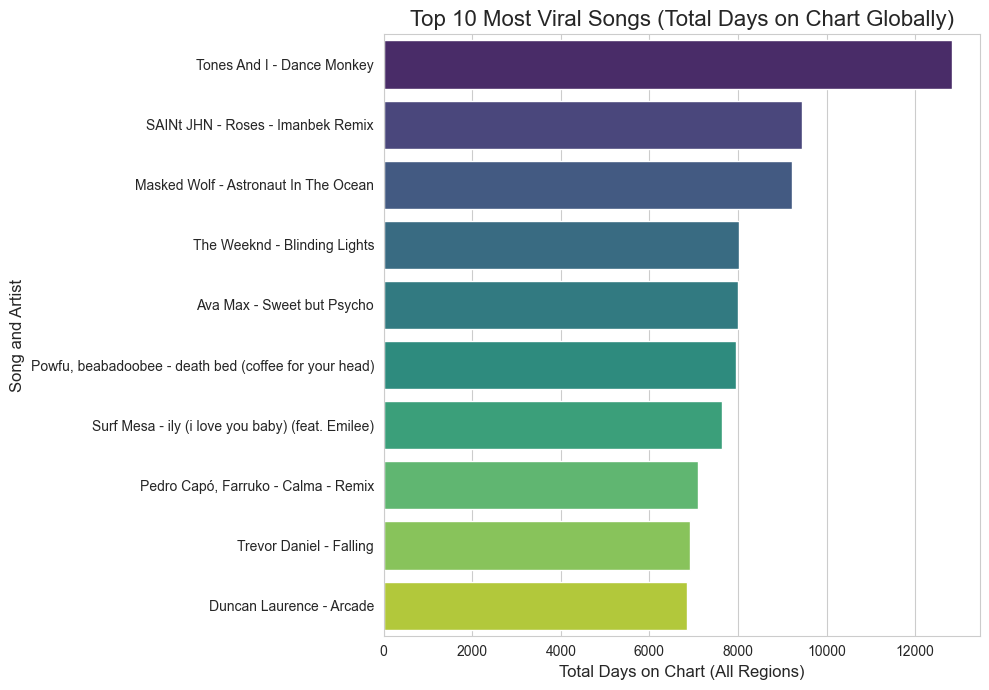

In [36]:
print("Creating visualization...")

# 1. Get just the top 10 songs from the previous step
top_10_to_plot = top_viral_songs.head(10)

# 2. Create a clean label for the chart (e.g., "Artist - Title")
top_10_to_plot['song_artist'] = top_10_to_plot['artist'] + ' - ' + top_10_to_plot['title']

# 3. Create the plot
plt.figure(figsize=(10, 7))  # Set the figure size to be nice and readable
sns.barplot(
    x='total_days_on_chart',  # Horizontal axis
    y='song_artist',          # Vertical axis
    data=top_10_to_plot, 
    palette='viridis'         # A nice color scheme
)

# 4. Add titles and labels
plt.title('Top 10 Most Viral Songs (Total Days on Chart Globally)', fontsize=16)
plt.xlabel('Total Days on Chart (All Regions)', fontsize=12)
plt.ylabel('Song and Artist', fontsize=12)

# 5. Show the plot
plt.tight_layout()  # Fits the labels nicely
plt.show()

In [37]:
print("Finding the most viral artists...")

# 1. First, we only need one row for each unique song-artist combination
#    We don't care if a song was on the chart 1 day or 100 days, just that it appeared
unique_songs_by_artist = viral_df.drop_duplicates(subset=['title', 'artist'])

# 2. Now, group by 'artist' and count how many unique 'title' rows they have
artist_virality = unique_songs_by_artist.groupby('artist').size().reset_index(name='unique_song_count')

# 3. Sort to find the artists with the most unique songs
top_viral_artists = artist_virality.sort_values(by='unique_song_count', ascending=False)

# 4. Print the Top 10
print("\nTop 10 Most Viral Artists (by Number of Unique Songs):")
print(top_viral_artists.head(10))

Finding the most viral artists...

Top 10 Most Viral Artists (by Number of Unique Songs):
                                        artist  unique_song_count
6738                                       BTS                106
68353                             Taylor Swift                 74
20024                               Ed Sheeran                 68
56871                                   Prince                 67
19071                                    Drake                 66
49698                              Mr.Children                 63
32241                                 Jay Chou                 58
55134  Patricio Rey y sus Redonditos de Ricota                 54
53588                            One Direction                 53
6889                                 Bad Bunny                 53


Creating visualization...


C:\Users\yashr\AppData\Local\Temp\ipykernel_20012\1614639370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


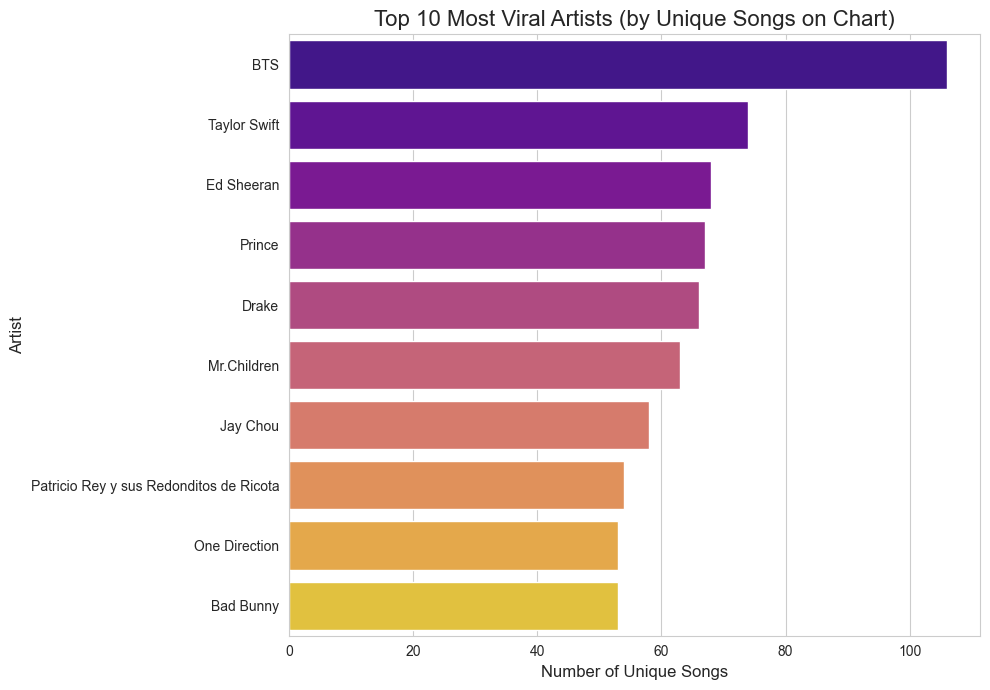

In [38]:
print("Creating visualization...")

# 1. Get just the top 10 artists
top_10_artists_to_plot = top_viral_artists.head(10)

# 2. Create the plot
plt.figure(figsize=(10, 7))
sns.barplot(
    x='unique_song_count',  # Horizontal axis
    y='artist',             # Vertical axis
    data=top_10_artists_to_plot,
    palette='plasma'        # A new color scheme
)

# 3. Add titles and labels
plt.title('Top 10 Most Viral Artists (by Unique Songs on Chart)', fontsize=16)
plt.xlabel('Number of Unique Songs', fontsize=12)
plt.ylabel('Artist', fontsize=12)

# 4. Show the plot
plt.tight_layout()
plt.show()

In [39]:
# Run this to see your Top 20 list again
print(top_viral_songs.head(20))

                                                    title  \
24633                                        Dance Monkey   
92845                               Roses - Imanbek Remix   
8332                               Astronaut In The Ocean   
14089                                     Blinding Lights   
105005                                   Sweet but Psycho   
125976                   death bed (coffee for your head)   
126422               ily (i love you baby) (feat. Emilee)   
17747                                       Calma - Remix   
35578                                             Falling   
7837                                               Arcade   
97376                                             Shallow   
100987                                  Someone You Loved   
95512                                              Say So   
51627                                          In My Mind   
60719                                              Lalala   
12101                   

In [40]:
# --- !! EDIT THESE TWO LINES !! ---
song_to_track = 'Dance Monkey'
artist_of_song = 'Tones And I'
# --- !! ---------------------- !! ---

print(f"Attempting to track: {artist_of_song} - {song_to_track}")

# 1. Create a new DataFrame with only this one song's data
one_song_df = viral_df[
    (viral_df['title'] == song_to_track) & 
    (viral_df['artist'] == artist_of_song)
].copy()

# 2. Check if we found it
if one_song_df.empty:
    print(f"--- ERROR: Song not found ---")
    print("Please check spelling/capitalization and try again.")
else:
    print(f"--- SUCCESS ---")
    print(f"Found {len(one_song_df)} total entries for this song.")

Attempting to track: Tones And I - Dance Monkey
--- SUCCESS ---
Found 12824 total entries for this song.


Analyzing spread over time...

--- Analysis Complete ---
The song's peak was on 2019-08-13, when it was viral in 67 countries on the same day!

Creating visualization of global spread...


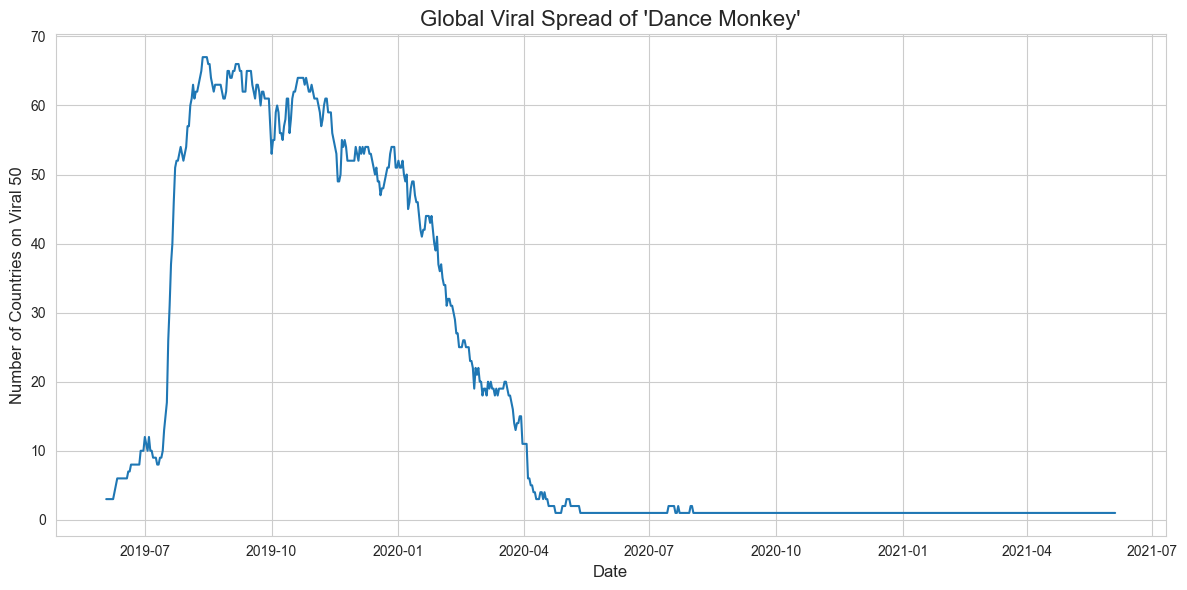

In [41]:
# We check again if the 'one_song_df' is empty
if one_song_df.empty:
    print("Cannot analyze or plot. The song DataFrame is empty.")
else:
    print("Analyzing spread over time...")
    
    # 1. Group by 'date' and count unique 'region' (countries)
    spread_over_time = one_song_df.groupby('date')['region'].nunique().reset_index(name='country_count')
    
    # 2. Sort by date
    spread_over_time = spread_over_time.sort_values(by='date')
    
    # 3. Find the song's peak virality
    peak_virality = spread_over_time.sort_values(by='country_count', ascending=False).head(1)
    
    # Get the values from our 1-row DataFrame
    peak_date = peak_virality['date'].dt.date.iloc[0]
    peak_countries = peak_virality['country_count'].iloc[0]

    print(f"\n--- Analysis Complete ---")
    print(f"The song's peak was on {peak_date}, when it was viral in {peak_countries} countries on the same day!")

    # --- Create the Visualization ---
    
    print("\nCreating visualization of global spread...")

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=spread_over_time,
        x='date',
        y='country_count'
    )
    plt.title(f"Global Viral Spread of '{song_to_track}'", fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Countries on Viral 50', fontsize=12)
    plt.tight_layout()
    plt.show()